# ANALISIS SENSIBILIDAD RAIGRASSES POR LOCALIDAD y CULTIVAR


### Lectura datos originales y modelo GBR entrenado con ellos

In [1]:
# Reimportar las bibliotecas necesarias después del reinicio
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import joblib
from sklearn.preprocessing import LabelEncoder
import sklearn
from sklearn.model_selection import KFold, cross_val_predict
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Recargar el modelo GradientBoostingRegressor
model_path = "/content/gradient_boosting_optuna.pkl"
model_loaded = joblib.load(model_path)

# Recargar los datos originales desde el archivo Excel
data_path = "DatosmodeloRaigrasfinalv10-yield.xlsx"
df = pd.read_excel(data_path)

# Seleccionar las variables predictoras y la variable objetivo
features = ['Localidad', 'Cultivar', 'Tmax(ºC)', 'Tmin(ºC)', 'Precipitación(mm)', 'Radiación(MJ/m2 dia)']
target = 'kg MS/ha'

# Codificar las variables categóricas
label_encoders = {}
for col in ['Localidad', 'Cultivar']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


## Funcion de prediccion

In [2]:
# Modificar la función para excluir los puntos reales de los datos en la gráfica

def plot_variable_evolution_no_points(variable_predictora, localidad):
    """
    Genera una curva que muestra la evolución de la variable objetivo kg MS/ha
    en función de la variable predictora elegida y para cada cultivar dentro de la localidad seleccionada.
    No incluye los puntos de datos reales en la gráfica.

    :param variable_predictora: str, nombre de la variable predictora a analizar (Ej: 'Tmin(ºC)')
    :param localidad: str, nombre de la localidad a analizar
    """

    # Verificar si la variable predictora es válida
    if variable_predictora not in features:
        raise ValueError(f"La variable {variable_predictora} no está en las variables predictoras.")

    # Convertir la localidad a su valor codificado
    if localidad in label_encoders['Localidad'].classes_:
        localidad_encoded = label_encoders['Localidad'].transform([localidad])[0]
    else:
        raise ValueError(f"La localidad '{localidad}' no está en los datos.")

    # Filtrar datos por la localidad seleccionada
    df_localidad = df[df['Localidad'] == localidad_encoded]

    # Obtener valores mínimos y máximos de la variable predictora en la localidad
    min_val = df_localidad[variable_predictora].min()
    max_val = df_localidad[variable_predictora].max()

    # Crear un rango de valores dentro del intervalo observado en los datos
    values_range = np.linspace(min_val, max_val, 50)

    # Obtener la lista de cultivares en la localidad
    cultivares = df_localidad['Cultivar'].unique()

    # Crear un dataframe base con valores medios de cada variable predictora para la localidad y cultivar
    X_base = df_localidad.groupby('Cultivar').mean().reset_index()

    # Asegurar que el DataFrame contiene solo las columnas necesarias
    X_base = X_base[features]

    # Asignar la localidad codificada
    X_base['Localidad'] = localidad_encoded

    # Generar predicciones para cada cultivar y para cada valor de la variable predictora
    plt.figure(figsize=(8, 6))

    for cultivar in cultivares:
        # Obtener valores medios de otras variables para ese cultivar
        X_cultivar = X_base[X_base['Cultivar'] == cultivar].copy()

        # Convertir cultivar a su valor codificado
        cultivar_name = label_encoders['Cultivar'].inverse_transform([cultivar])[0]

        # Lista para almacenar predicciones
        predictions = []

        for val in values_range:
            # Copiar valores base y actualizar la variable predictora seleccionada
            X_temp = X_cultivar.copy()
            X_temp[variable_predictora] = val

            # Asegurar que X_temp tenga las mismas columnas y sin duplicados
            X_temp = X_temp[features]

            # Hacer predicción con el modelo
            pred = model_loaded.predict(X_temp)[0]
            predictions.append(pred)

        # Graficar la curva de predicción para el cultivar
        plt.plot(values_range, predictions, label=f'Cultivar: {cultivar_name}', linewidth=2)

    # Configuración de la gráfica
    plt.xlabel(variable_predictora)
    plt.ylabel(target)
    plt.title(f'Evolución de {target} frente a {variable_predictora} en {localidad}')
    plt.legend()
    plt.grid(True)
    plt.show()


## Definición de las variables predictoras elegidas y localidades

Generando gráfico para Tmin(ºC) en Mabegondo...


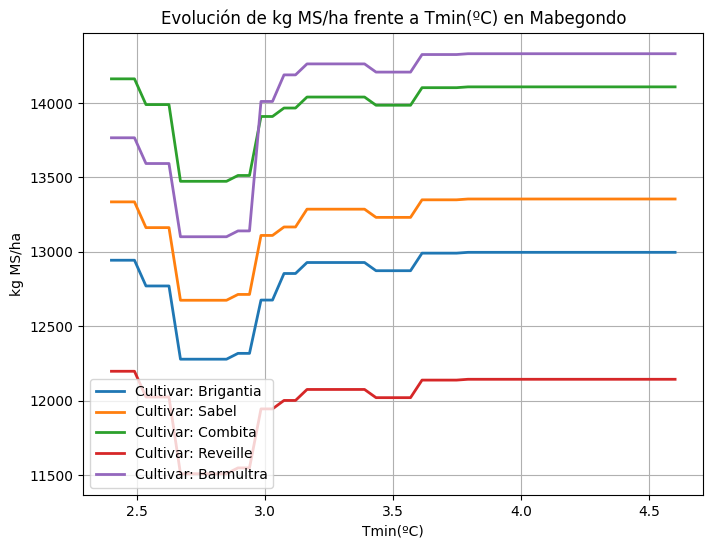

Generando gráfico para Tmax(ºC) en Mabegondo...


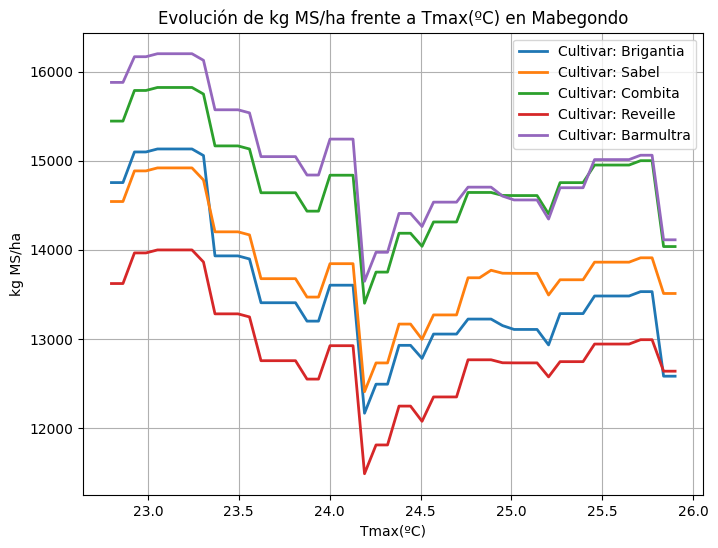

Generando gráfico para Precipitación(mm) en Mabegondo...


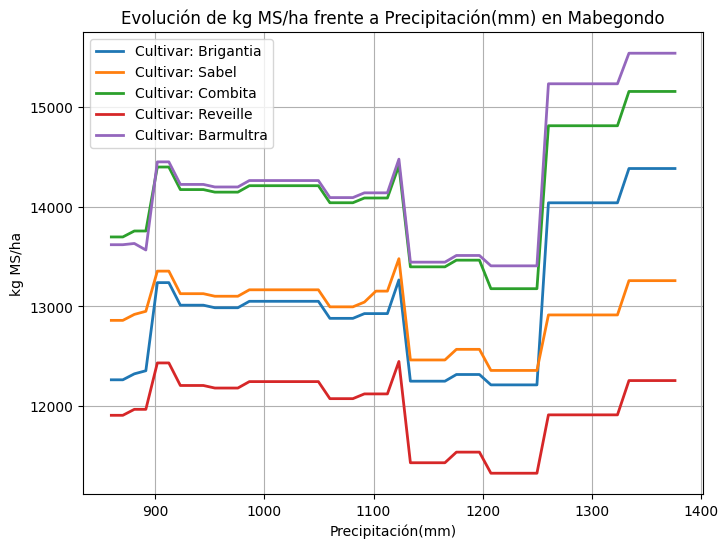

Generando gráfico para Tmin(ºC) en Puebla...


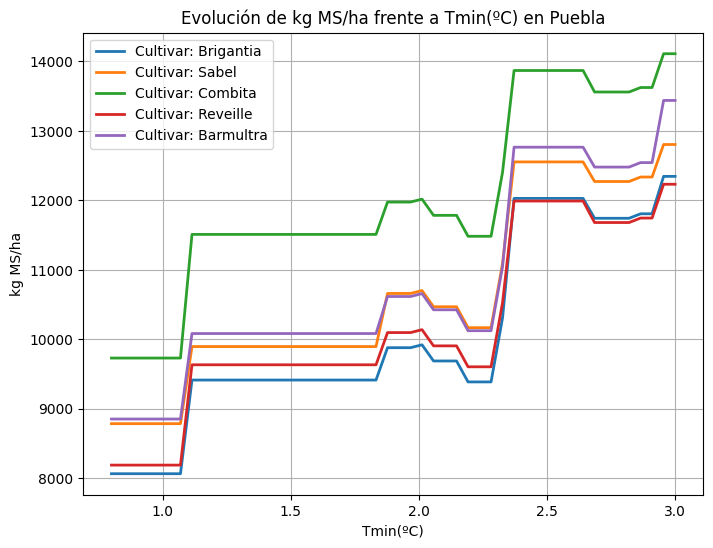

Generando gráfico para Tmax(ºC) en Puebla...


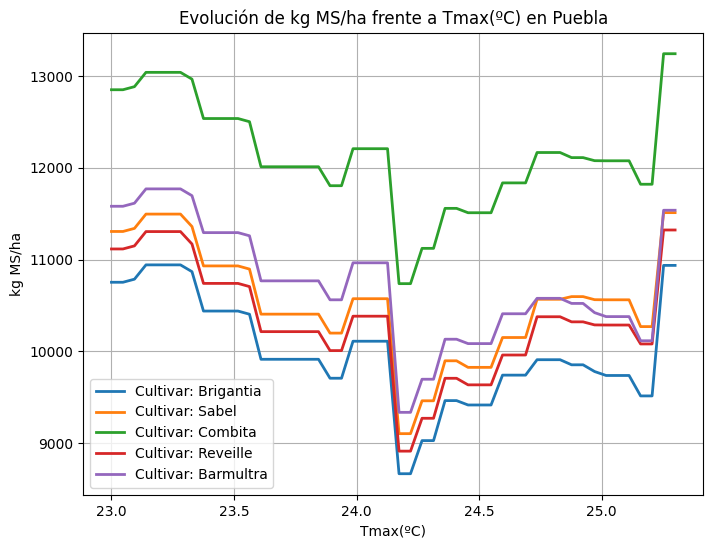

Generando gráfico para Precipitación(mm) en Puebla...


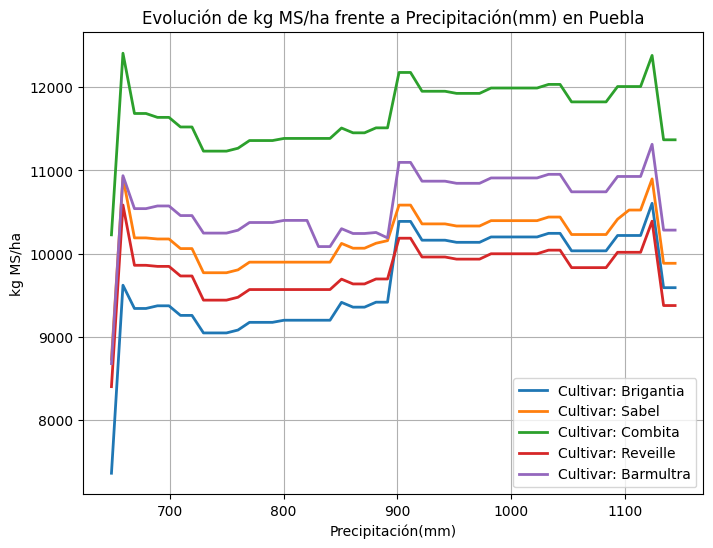

Generando gráfico para Tmin(ºC) en Grado...


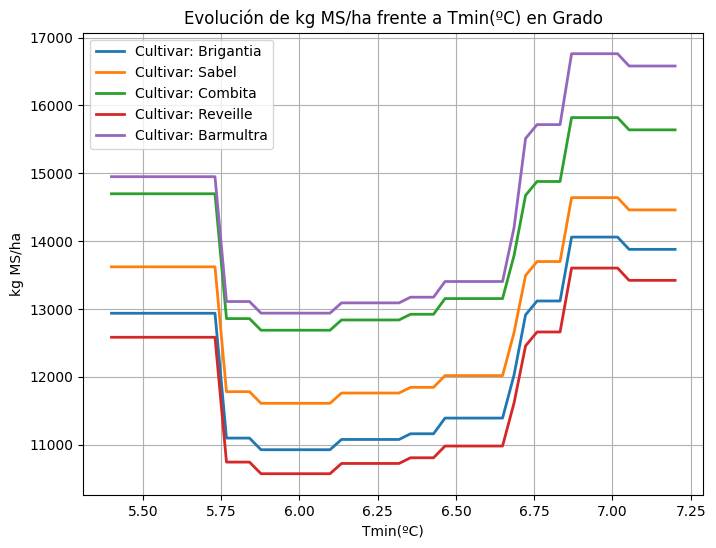

Generando gráfico para Tmax(ºC) en Grado...


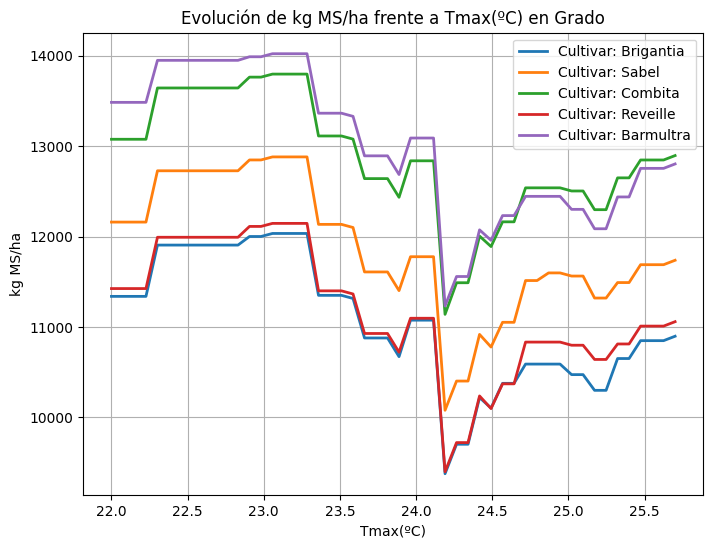

Generando gráfico para Precipitación(mm) en Grado...


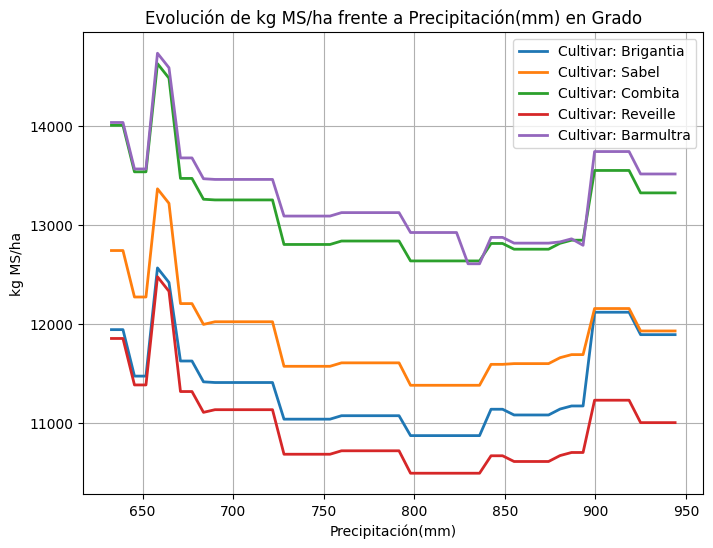

In [3]:
# Lista de localidades y variables predictoras a analizar
localidades = ["Mabegondo", "Puebla", "Grado"]
variables_predictoras = ["Tmin(ºC)", "Tmax(ºC)", "Precipitación(mm)"]

# Generar las 9 figuras
for localidad in localidades:
    for variable in variables_predictoras:
        print(f"Generando gráfico para {variable} en {localidad}...")
        plot_variable_evolution_no_points(variable, localidad)

## Grabado de ficheros excel

In [4]:
import os

def save_data_for_graphs(variable_predictora, localidad):
    """
    Genera los datos utilizados en las gráficas de evolución de kg MS/ha
    y los guarda en un archivo Excel con nombre específico.

    :param variable_predictora: str, nombre de la variable predictora a analizar (Ej: 'Tmin(ºC)')
    :param localidad: str, nombre de la localidad a analizar
    """

    # Verificar si la variable predictora es válida
    if variable_predictora not in features:
        raise ValueError(f"La variable {variable_predictora} no está en las variables predictoras.")

    # Convertir la localidad a su valor codificado
    if localidad in label_encoders['Localidad'].classes_:
        localidad_encoded = label_encoders['Localidad'].transform([localidad])[0]
    else:
        raise ValueError(f"La localidad '{localidad}' no está en los datos.")

    # Filtrar datos por la localidad seleccionada
    df_localidad = df[df['Localidad'] == localidad_encoded]

    # Obtener valores mínimos y máximos de la variable predictora en la localidad
    min_val = df_localidad[variable_predictora].min()
    max_val = df_localidad[variable_predictora].max()

    # Crear un rango de valores dentro del intervalo observado en los datos
    values_range = np.linspace(min_val, max_val, 50)

    # Obtener la lista de cultivares en la localidad
    cultivares = df_localidad['Cultivar'].unique()

    # Crear un dataframe base con valores medios de cada variable predictora para la localidad y cultivar
    X_base = df_localidad.groupby('Cultivar').mean().reset_index()

    # Asegurar que el DataFrame contiene solo las columnas necesarias
    X_base = X_base[features]

    # Asignar la localidad codificada
    X_base['Localidad'] = localidad_encoded

    # Almacenar los datos generados
    data_list = []

    for cultivar in cultivares:
        # Obtener valores medios de otras variables para ese cultivar
        X_cultivar = X_base[X_base['Cultivar'] == cultivar].copy()

        # Convertir cultivar a su valor codificado
        cultivar_name = label_encoders['Cultivar'].inverse_transform([cultivar])[0]

        for val in values_range:
            # Copiar valores base y actualizar la variable predictora seleccionada
            X_temp = X_cultivar.copy()
            X_temp[variable_predictora] = val

            # Asegurar que X_temp tenga las mismas columnas y sin duplicados
            X_temp = X_temp[features]

            # Hacer predicción con el modelo
            pred = model_loaded.predict(X_temp)[0]

            # Guardar los valores en la lista
            data_list.append([cultivar_name, val, pred])

    # Convertir los datos en un DataFrame
    df_results = pd.DataFrame(data_list, columns=['Cultivar', variable_predictora, 'kg MS/ha'])

    # Generar el nombre del archivo
    filename = f"{localidad}_{variable_predictora}_datos.xlsx"

    # Guardar en un archivo Excel
    df_results.to_excel(filename, index=False)

    return filename

# Crear y guardar los archivos de datos
files_generated = []
for localidad in localidades:
    for variable in variables_predictoras:
        file_path = save_data_for_graphs(variable, localidad)
        files_generated.append(file_path)

# Mostrar los archivos generados
print(files_generated)


['Mabegondo_Tmin(ºC)_datos.xlsx', 'Mabegondo_Tmax(ºC)_datos.xlsx', 'Mabegondo_Precipitación(mm)_datos.xlsx', 'Puebla_Tmin(ºC)_datos.xlsx', 'Puebla_Tmax(ºC)_datos.xlsx', 'Puebla_Precipitación(mm)_datos.xlsx', 'Grado_Tmin(ºC)_datos.xlsx', 'Grado_Tmax(ºC)_datos.xlsx', 'Grado_Precipitación(mm)_datos.xlsx']
